In [1]:
import requests
import json
import pandas as pd
import iso8601
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://api.covid19api.com/all'
x = requests.get(url)
py_data = x.json()
#py_data

In [3]:
new_file = pd.DataFrame.from_dict(py_data)

In [4]:
new_file.head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-22T00:00:00Z
1,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-23T00:00:00Z
2,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-24T00:00:00Z
3,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-25T00:00:00Z
4,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-26T00:00:00Z


In [5]:
new_file['Date'] = new_file.Date.str.split('T',expand=True)[0]

In [6]:
new_file.dtypes

Country        object
CountryCode    object
Province       object
City           object
CityCode       object
Lat            object
Lon            object
Confirmed       int64
Deaths          int64
Recovered       int64
Active          int64
Date           object
dtype: object

In [7]:
new_file['Date'] = pd.to_datetime(new_file['Date'])

In [8]:
new_file.head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-22
1,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-23
2,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-24
3,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-25
4,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-26


In [9]:
new_file.shape

(407856, 12)

# EDA 

In [10]:
new_file.Country.nunique()

186

We have data records for 186 countries relating to coronvirus and the records are captured from 22 January to 15 May 2020.

DataFrame seem to include subtotal for Deaths, confirm and recovery cases in states(e.g. New York, California, etc).
so, I going to remove all the state data - which leaves the data at the country level. 

# Total Cases - COVID19

In [11]:
new_data = new_file[(new_file['Province']== "")]

In [12]:
death = pd.pivot_table(new_data,index='Date',columns='Country',values='Deaths',aggfunc='sum').sort_index(ascending=False)
conf = pd.pivot_table(new_data,index='Date',columns='Country',values='Confirmed',aggfunc='sum').sort_index(ascending=False)
Rec = pd.pivot_table(new_data,index='Date',columns='Country',values='Recovered',aggfunc='sum').sort_index(ascending=False)
Act = pd.pivot_table(new_data,index='Date',columns='Country',values='Active',aggfunc='sum').sort_index(ascending=False)
death_pre =death.iloc[0]/death.iloc[0].sum()
Rec_pre =Rec.iloc[0]/Rec.iloc[0].sum()

In [13]:
print('Total Number of Deaths in the World :',death.iloc[0].sum())
print('Total Number of Confirmed Cases  in the World :',conf.iloc[0].sum())
print('Total Number of Recovered Cases in the World :',Rec.iloc[0].sum())
print('Total Number of Active Cases in the World :',Act.iloc[0].sum())

Total Number of Deaths in the World : 306881
Total Number of Confirmed Cases  in the World : 4538137
Total Number of Recovered Cases in the World : 1604046
Total Number of Active Cases in the World : 2627210


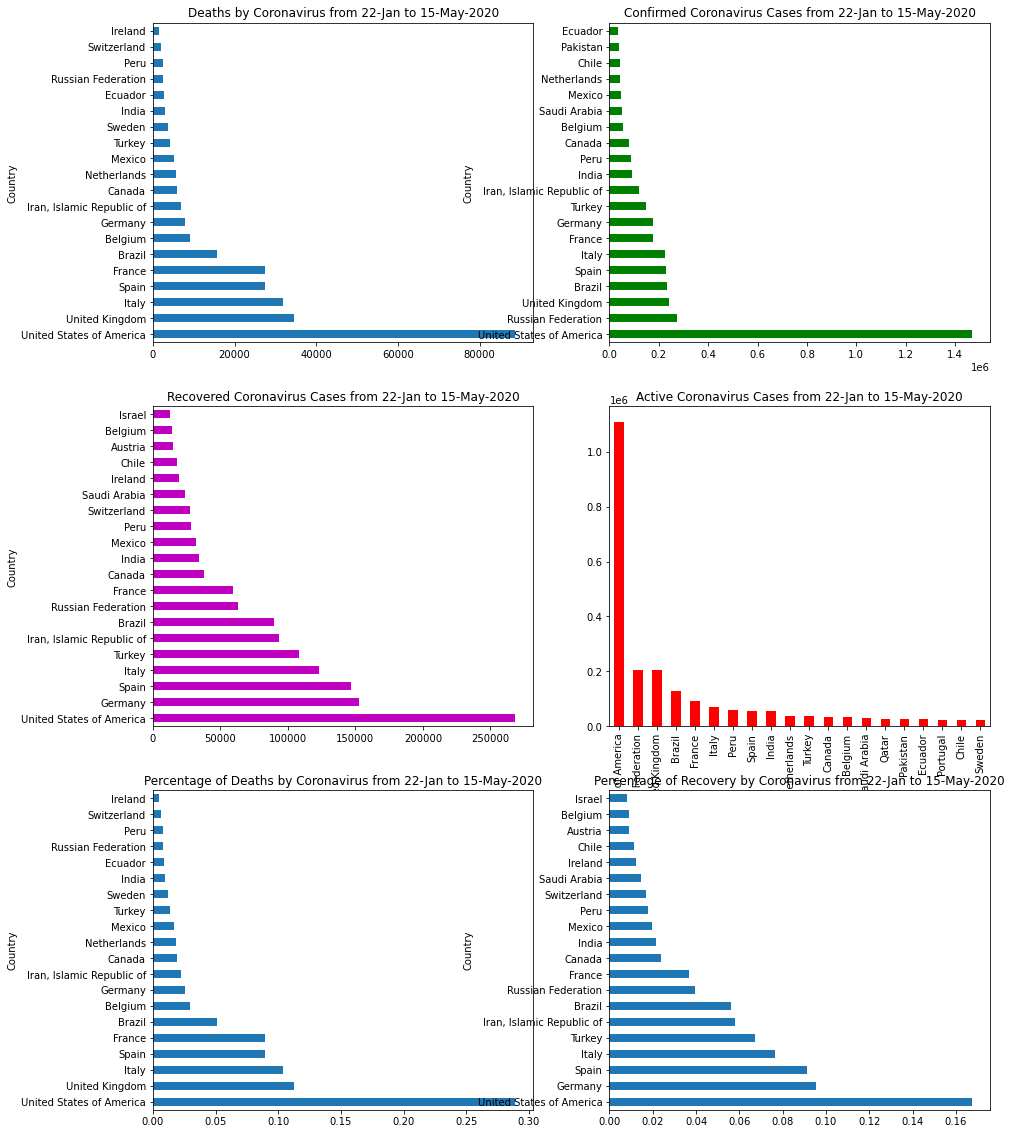

In [14]:
fig,ax=plt.subplots(3,2,figsize=(15,20))
death.iloc[0].nlargest(20).plot(kind='barh',title='Deaths by Coronavirus from 22-Jan to 15-May-2020',ax=ax[0][0])
conf.iloc[0].nlargest(20).plot(kind='barh',title='Confirmed Coronavirus Cases from 22-Jan to 15-May-2020',color='g',ax=ax[0][1])
Rec.iloc[0].nlargest(20).plot(kind='barh',title='Recovered Coronavirus Cases from 22-Jan to 15-May-2020',color='m',ax=ax[1][0])
Act.iloc[0].nlargest(20).plot(kind='bar',title='Active Coronavirus Cases from 22-Jan to 15-May-2020',color='r',ax=ax[1][1])
death_pre.nlargest(20).plot(kind='barh',title='Percentage of Deaths by Coronavirus from 22-Jan to 15-May-2020',ax=ax[2][0])
Rec_pre.nlargest(20).plot(kind='barh',title='Percentage of Recovery by Coronavirus from 22-Jan to 15-May-2020',ax=ax[2][1])

USA has the highest number of 1,442,824 confirmed Cases and Active Cases. 

- 28% of the people died of Coronavirus were from USA, followed by UK at 12%.

- 87% of the Confirmed cases in Germany end up recovering from the virus



# Daily Cases - COVID19

Creating new columns in DataFrame

- Daily Deaths Cases

- Daily Confirm Cases

- Daily Active Cases

- Daily Recovery Cases

In [16]:
import numpy as np
col_data = new_data['Deaths'].values
conf_data = new_data['Confirmed'].values
rec_data = new_data['Recovered'].values
act_data = new_data['Active'].values
diff_death = np.diff(col_data)
diff_death = np.insert(diff_death, 0, 0)
diff_conf= np.diff(conf_data)
diff_conf = np.insert(diff_conf, 0, 0)
diff_rec= np.diff(rec_data)
diff_rec = np.insert(diff_rec, 0, 0)
diff_act = np.diff(act_data)
diff_act = np.insert(diff_act, 0, 0)
new_data['diff_death'] = abs(diff_death)
new_data['diff_conf'] = abs(diff_conf)
new_data['diff_rec'] = abs(diff_rec)
new_data['diff_act'] = abs(diff_act)

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [17]:
new_data = new_data[new_data['Date']>'2020-01-22']

In [18]:
#usa = new_data[new_data['Country']=='United States of America']
Deaths_day = pd.pivot_table(new_data,index='Date',values='diff_death',aggfunc='sum').sort_index(ascending=False).reset_index()
Deaths_day = Deaths_day[Deaths_day['diff_death']>0]
conf_day = pd.pivot_table(new_data,index='Date',values='diff_conf',aggfunc='sum').sort_index(ascending=False).reset_index()
conf_day = conf_day[conf_day['diff_conf']>0]
rec_day = pd.pivot_table(new_data,index='Date',values='diff_rec',aggfunc='sum').sort_index(ascending=False).reset_index()
rec_day = rec_day[rec_day['diff_rec']>0]
act_day = pd.pivot_table(new_data,index='Date',values='diff_act',aggfunc='sum').sort_index(ascending=False).reset_index()
act_day = act_day[act_day['diff_act']>0]

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  import sys
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Daily Active  Cases in the World')

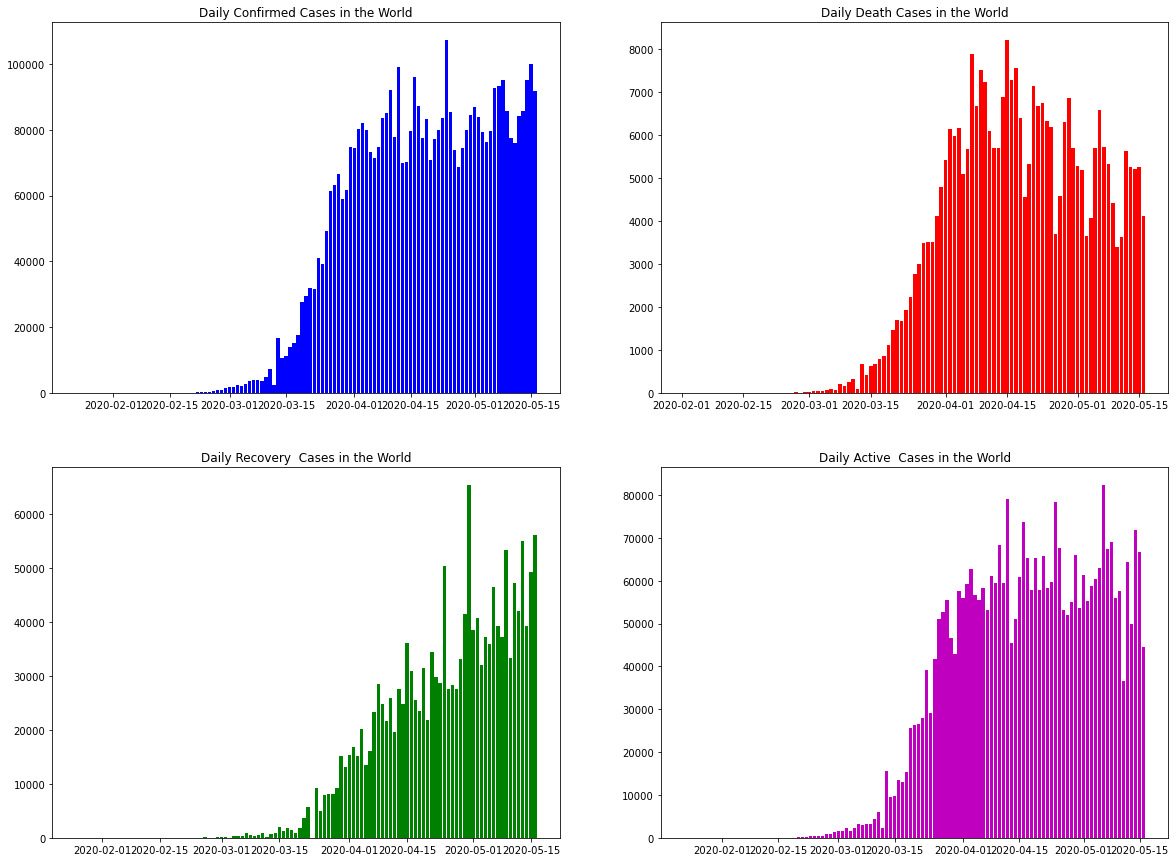

In [22]:
#fig,ax=plt.subplots(2,2,figsize=(20,10),squeeze=False)
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(221)
plt.bar(conf_day['Date'],conf_day['diff_conf'],color='b')
ax1.set_title("Daily Confirmed Cases in the World")
ax2 = fig.add_subplot(222)
plt.bar(Deaths_day['Date'],Deaths_day['diff_death'],color='R')
ax2.set_title("Daily Death Cases in the World")
ax3 = fig.add_subplot(223)
plt.bar(rec_day['Date'],rec_day['diff_rec'],color='G')
ax3.set_title("Daily Recovery  Cases in the World")
ax4 = fig.add_subplot(224)
plt.bar(act_day['Date'],act_day['diff_act'],color='m')
ax4.set_title("Daily Active  Cases in the World")

- Daily confirmed covid cases are still rising as more testing is been carried out.

- Daily death covid Cases have going back up again as more people are leaving their houses to attend school/work.

- Daily active cases are more stable compare to month ago, this could be correlated with Summer season as less people are getting sick from cold.

- Daily recovery cases have been rising as most of the countries have flatten the curve.

# Correlation - COVID19

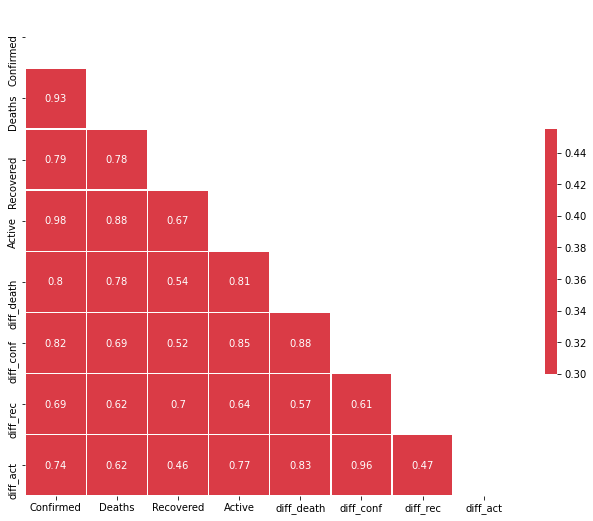

In [23]:
corr= new_data.corr()
# Generate a mask for the upper triangle

mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})

diff_ columns represents daily cases of Covid-19.

# USA - COVID19

USA is one of the hardest country hit by Covid-19 and It could be interesting to see the analysis around the four metrics. 

- Linegraph for Covid19

- Tableau Dashboard

In [203]:
usa = new_data[new_data['Country']=='United States of America']

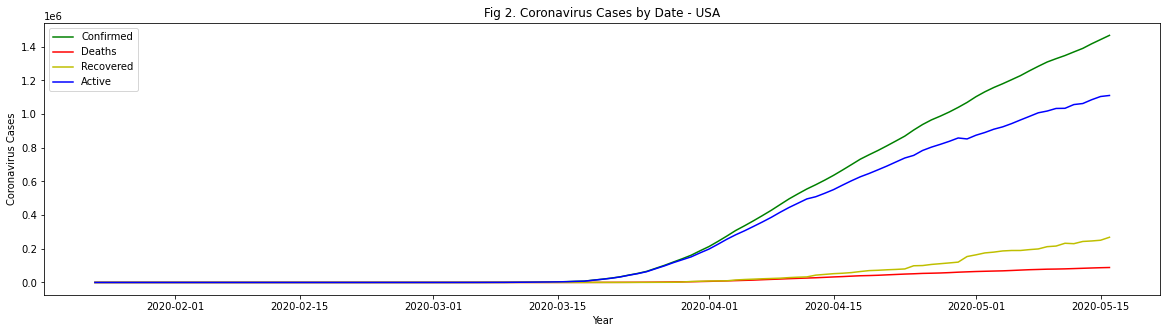

In [205]:
conf = usa.groupby(by=['Date'], as_index=False)['Confirmed'].sum()
Death = usa.groupby(by=['Date'], as_index=False)['Deaths'].sum()
Rec = usa.groupby(by=['Date'], as_index=False)['Recovered'].sum()
Act = usa.groupby(by=['Date'], as_index=False)['Active'].sum()
#Dates_Avg = Dates.sort_values('Confirmed', ascending=False)
plt.figure(figsize=(20,5))
a = plt.plot(conf.Date, conf.Confirmed,color='G',label='Confirmed')
b = plt.plot(Death.Date, Death.Deaths,color='R',label='Deaths')
c = plt.plot(Rec.Date, Rec.Recovered,color='Y',label='Recovered')
d, = plt.plot(Act.Date, Act.Active,color='B',label='Active')
plt.title('Fig 2. Coronavirus Cases by Date - USA')
plt.xlabel('Year')
plt.ylabel('Coronavirus Cases')
plt.legend(handles=[a[0],b[0],c[0],d])
plt.show()

USA has alot more active covid cases then any other country. Also the ratio between recovery and active cases has a huge gap, which means more people are end up dying from the virus.

# Tableau Dashboard

In [ ]:
Second part of the analysis would be carried out on Tableau, link can be found on below. 

https://public.tableau.com/profile/jas2719#!/vizhome/WorldCovid19_15897354026970/Dashboard1
    
https://public.tableau.com/profile/jas2719#!/vizhome/WorldCovid19_15897354026970/Dashboard2